# Main Simulation

Positive Profits: 6832
Negative Profits: 3168
Mean profit: 123795.62756262577
Standard Deviatin of profits: 365609.3933364309
Highest Profit: 11407307.82550394
Lowest Profit: -321313.8680941735


([<matplotlib.axis.XTick at 0x7f18842e54d0>,
 <a list of 11 Text xticklabel objects>)

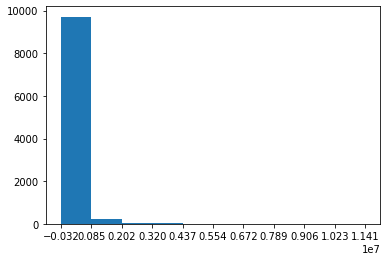

In [14]:
import random
import numpy as np
from matplotlib import pyplot as plt
import os



def sim(stock_price,total_days):
    initial_stock_price=stock_price
    initial_stocks=0
    portfolio=initial_stocks
    cost=0
    price_history=np.zeros(total_days)
    days=np.arange(0,total_days,1)
    for i in range(total_days):
        percentage_change=np.random.normal(0.2,4.5,1)[0]
        stock_price=stock_price+(stock_price*percentage_change*0.01)
        price_history[i]=stock_price
        #print(f"Day: {i} Stock Price is {stock_price}")
        if percentage_change<100:
            buy=3
            cost+=buy*stock_price
            portfolio+=3
                
    profit=(portfolio*stock_price)-cost
    return profit


n=10000
positive_profits_count=0
profits=np.zeros(n)

for i in range(n):
    os.system("cls")
    profits[i]=sim(10,1000)
    if profits[i]>0:
        positive_profits_count+=1

print("Positive Profits:",positive_profits_count)
print("Negative Profits:",n-positive_profits_count)
print("Mean profit:",np.mean(profits))
print("Standard Deviatin of profits:",np.std(profits))
print("Highest Profit:",np.max(profits))
print("Lowest Profit:",np.min(profits))
n,bins,edges=plt.hist(profits,bins=10)